In [195]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *

# 0. Drude

### 0.1 Metal-Air interface

In [350]:
def vacuum(omega):
    return 1

In [351]:
def drude(frequency, plasma_frequency=1, eps_inf=1.):
    return eps_inf - (plasma_frequency / frequency) ** 2 

In [352]:
def k_z(omega, k_par, permeability):
    return np.sqrt(permeability(omega) * omega**2 - k_par**2)

def refl_ampl(polarization, omega, k_par, permeability_film, permeability_surr):
    if polarization == 's':
        a = k_z(omega, k_par, permeability_surr) - k_z(omega, k_par, permeability_film)
        b = k_z(omega, k_par, permeability_surr) + k_z(omega, k_par, permeability_film)
        return a / b
    elif polarization == 'p':
        a = k_z(omega, k_par, permeability_surr) / permeability_surr(omega) - k_z(omega, k_par, permeability_film) / permeability_film(omega)
        b = k_z(omega, k_par, permeability_surr) / permeability_surr(omega) + k_z(omega, k_par, permeability_film) / permeability_film(omega)
        return a / b
    else:
        print('Wrong type of polarization.')
        return 0

Grid

In [353]:
grid_omega_1D = np.linspace(0, 4, 1000)
grid_beta_1D = np.linspace(0, 4, 1000)

grid_beta, grid_omega = np.meshgrid(grid_beta_1D, grid_omega_1D)
#np.isnan(grid).sum()

In [354]:
def det_S(polarization, omega, k_par, permeability1, permeability2):
    return -(refl_ampl(polarization, omega, k_par, permeability1, permeability2)) ** 2 - (1 - refl_ampl(polarization, omega, k_par, permeability1, permeability2)**2)

In [355]:
def interface_frequency(q, plasma_frequency=1):
    return plasma_frequency / np.sqrt(1 + 1/(2 * q ** 2) + np.sqrt(1 + 1 / (4 * q ** 4)))

/tmp/ipykernel_5491/3590612451.py:2: RuntimeWarning: divide by zero encountered in divide
  return eps_inf - (plasma_frequency / frequency) ** 2
/tmp/ipykernel_5491/3590612451.py:2: RuntimeWarning: invalid value encountered in divide
  return eps_inf - (plasma_frequency / frequency) ** 2
/tmp/ipykernel_5491/2820459564.py:10: RuntimeWarning: invalid value encountered in divide
  a = k_z(omega, k_par, permeability_surr) / permeability_surr(omega) - k_z(omega, k_par, permeability_film) / permeability_film(omega)
/tmp/ipykernel_5491/2820459564.py:11: RuntimeWarning: invalid value encountered in divide
  b = k_z(omega, k_par, permeability_surr) / permeability_surr(omega) + k_z(omega, k_par, permeability_film) / permeability_film(omega)
/tmp/ipykernel_5491/2820459564.py:12: RuntimeWarning: invalid value encountered in divide
  return a / b
/tmp/ipykernel_5491/3632488287.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore 

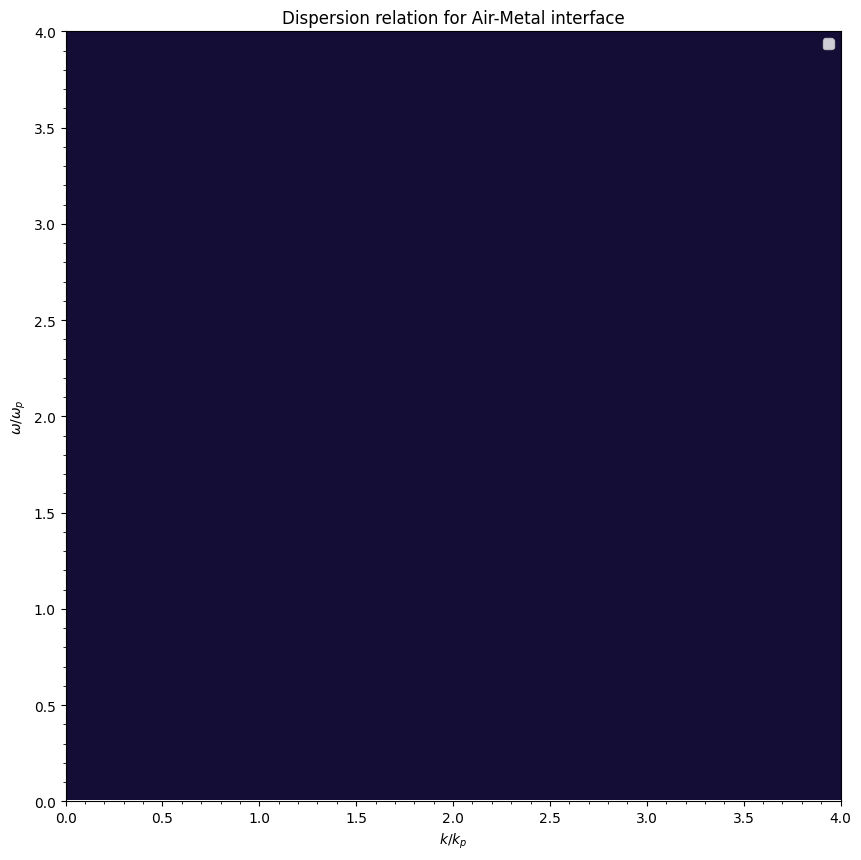

In [356]:
#grid = np.linspace(0, 1.55, 1000)
plt.figure(figsize=(10,10))

z = 1 / np.abs(det_S('p', grid_omega + 0.j, grid_beta + 0.j, drude, vacuum))
plt.imshow(z, cmap='magma', norm=plt.Normalize(vmin=0, vmax=10), aspect='auto', origin='lower', extent=[grid_beta.min(), grid_beta.max(), grid_omega.min(), grid_omega.max()])
#ax[i].plot(grid_omega_1D, grid_omega_1D, color='white') #light line

#plt.plot(grid, interface_frequency(grid), label='dispersion relation')
#plt.plot(grid, grid, color='black', linestyle='solid', label='light line')
#plt.plot(grid, np.repeat(1/np.sqrt(2), 1000), color='black', linestyle='dotted')

plt.minorticks_on()
plt.title('Dispersion relation for Air-Metal interface')
plt.xlabel('$k/k_p$')
plt.ylabel('$\\omega/\\omega_p$')
plt.legend()

plt.show()

In [357]:
grid_real = np.linspace(0, 2, 2000)
grid_imaginary_pos = np.linspace(0, .5, 1000)
grid_imaginary_neg = np.linspace(-.5, 0, 1000)

grid_imaginary = np.concatenate((grid_imaginary_neg, grid_imaginary_pos))
#print(grid_imaginary[1000])

grid_re, grid_im = np.meshgrid(grid_real, grid_imaginary)
grid = grid_re + 1.j * grid_im

np.isnan(grid).sum()

0

/tmp/ipykernel_5491/3590612451.py:2: RuntimeWarning: divide by zero encountered in divide
  return eps_inf - (plasma_frequency / frequency) ** 2
/tmp/ipykernel_5491/3590612451.py:2: RuntimeWarning: invalid value encountered in divide
  return eps_inf - (plasma_frequency / frequency) ** 2


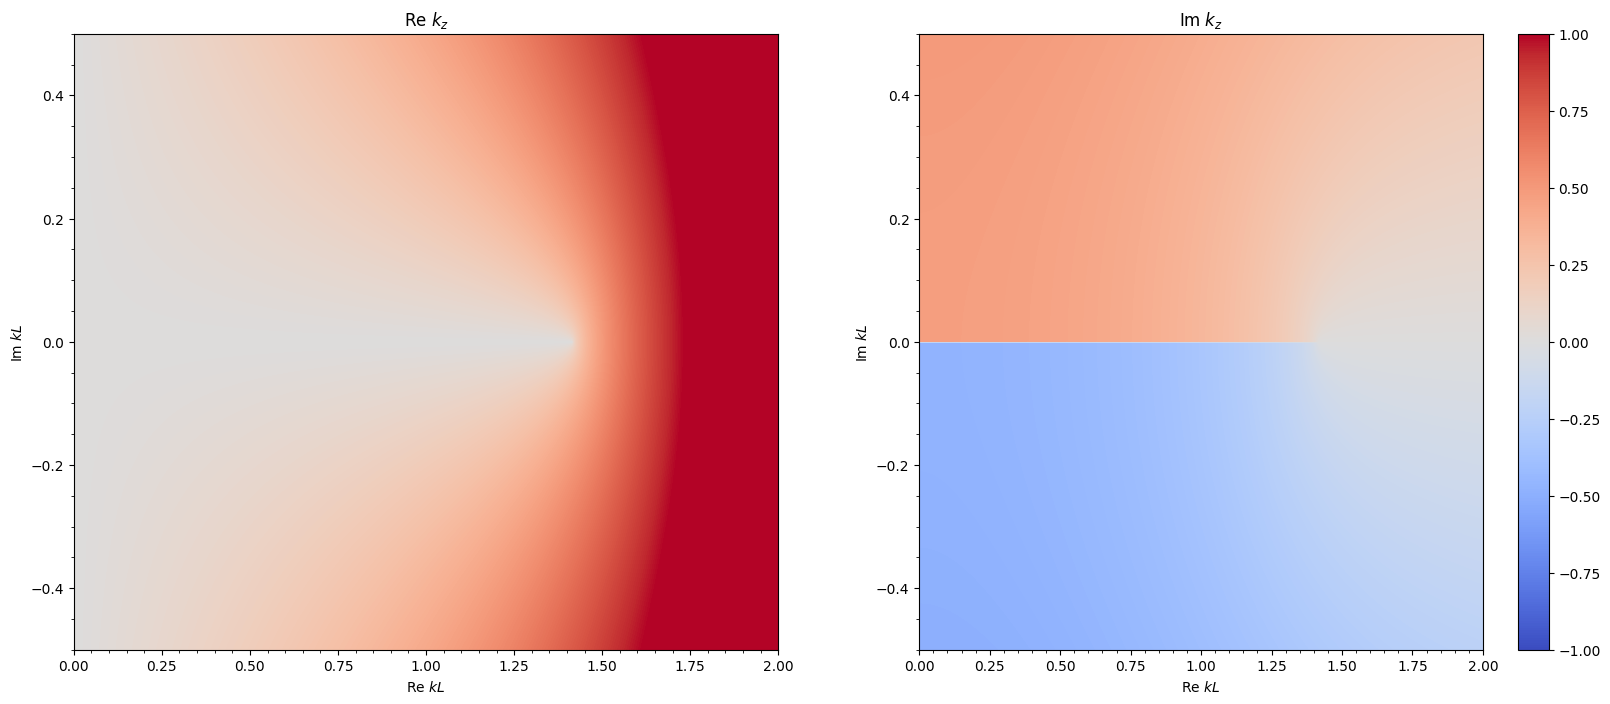

In [358]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))

#print(z)
pl=axs[0].imshow(np.real(k_z(grid, k_par=1, permeability=drude)), cmap='coolwarm', origin='lower', aspect='auto', vmin=-1, vmax=1, extent=[grid_real.min(), grid_real.max(), grid_im.min(), grid_im.max()])
axs[0].set_title('Re $k_z$')
axs[0].set_xlabel('Re $kL$')
axs[0].set_ylabel('Im $kL$')
axs[0].minorticks_on()

axs[1].imshow(np.imag(k_z(grid, k_par=1, permeability=drude)), cmap='coolwarm', origin='lower', aspect='auto', vmin=-3, vmax=3, extent=[grid_real.min(), grid_real.max(), grid_im.min(), grid_im.max()])
axs[1].set_title('Im $k_z$')
axs[1].set_xlabel('Re $kL$')
axs[1].set_ylabel('Im $kL$')
axs[1].minorticks_on()
fig.colorbar(pl, ax=axs[1])

plt.show()

### 0.2 The main problem

In [359]:
lambda_p = 2 * np.pi

In [360]:
L = np.array([0.2, 1, 5]) * lambda_p

In [361]:
def characteristic_func(polarization, l, omega, k_par, permeability_film, permeability_surr):
    return 1 - (refl_ampl(polarization, omega, k_par, permeability_film, permeability_surr))**2 * np.exp(2.j * k_z(omega, k_par, permeability_film) * l)

##### 0.2.1 Cladding

/tmp/ipykernel_5491/3590612451.py:2: RuntimeWarning: divide by zero encountered in divide
  return eps_inf - (plasma_frequency / frequency) ** 2
/tmp/ipykernel_5491/3590612451.py:2: RuntimeWarning: invalid value encountered in divide
  return eps_inf - (plasma_frequency / frequency) ** 2
/tmp/ipykernel_5491/2820459564.py:10: RuntimeWarning: invalid value encountered in divide
  a = k_z(omega, k_par, permeability_surr) / permeability_surr(omega) - k_z(omega, k_par, permeability_film) / permeability_film(omega)
/tmp/ipykernel_5491/2820459564.py:11: RuntimeWarning: invalid value encountered in divide
  b = k_z(omega, k_par, permeability_surr) / permeability_surr(omega) + k_z(omega, k_par, permeability_film) / permeability_film(omega)
/tmp/ipykernel_5491/2820459564.py:12: RuntimeWarning: invalid value encountered in divide
  return a / b
/tmp/ipykernel_5491/3397899169.py:4: RuntimeWarning: divide by zero encountered in divide
  z = 1 / abs(characteristic_func('p', L[i], grid_omega + 0.j, g

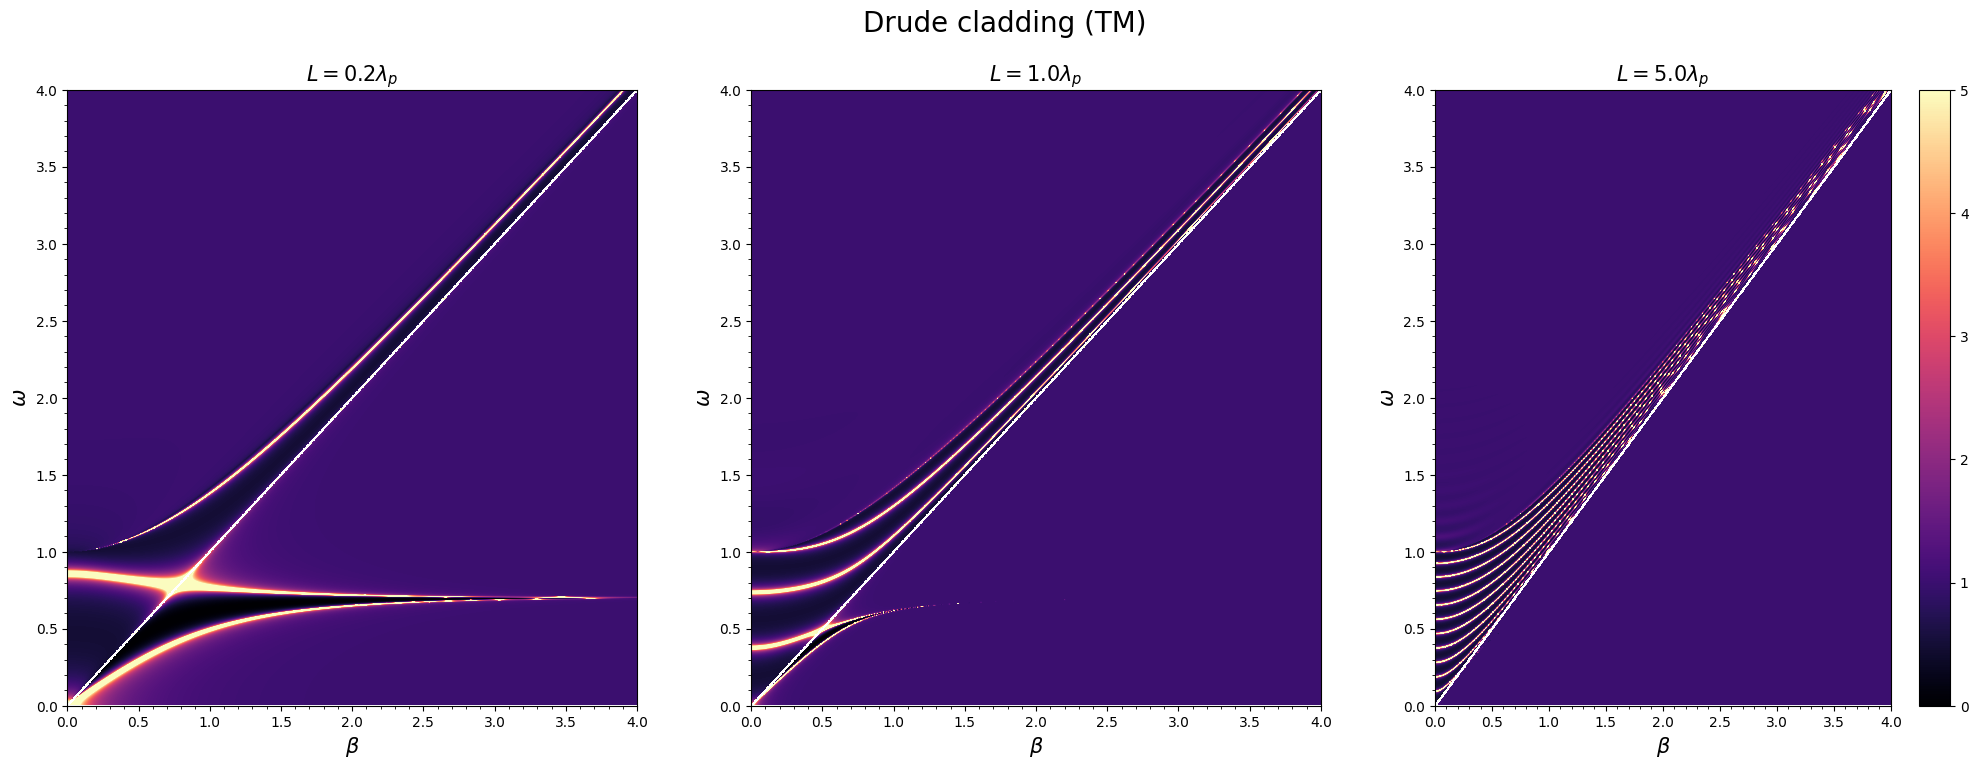

In [362]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(25, 8))

for i in range(3):
    z = 1 / abs(characteristic_func('p', L[i], grid_omega + 0.j, grid_beta + 0.j, vacuum, drude))
    pl=ax[i].imshow(z, cmap='magma', norm=plt.Normalize(vmin=0, vmax=5), aspect='auto', origin='lower', extent=[grid_beta.min(), grid_beta.max(), grid_omega.min(), grid_omega.max()])
    #ax[i].plot(grid_omega_1D, grid_omega_1D, color='white') #light line
    ax[i].set_title(f'$L={L[i] / lambda_p} \\lambda_p$', size=15)
    ax[i].set_xlabel('$\\beta$', size=15)
    ax[i].set_ylabel('$\\omega$', size=15)
    ax[i].minorticks_on()

fig.colorbar(pl, ax=ax[2])
fig.suptitle('Drude cladding (TM)', size=20)
plt.show()

/tmp/ipykernel_5491/3590612451.py:2: RuntimeWarning: divide by zero encountered in divide
  return eps_inf - (plasma_frequency / frequency) ** 2
/tmp/ipykernel_5491/3590612451.py:2: RuntimeWarning: invalid value encountered in divide
  return eps_inf - (plasma_frequency / frequency) ** 2
/tmp/ipykernel_5491/2820459564.py:8: RuntimeWarning: invalid value encountered in divide
  return a / b
/tmp/ipykernel_5491/493442015.py:4: RuntimeWarning: divide by zero encountered in divide
  z = 1 / abs(characteristic_func('s', L[i], grid_omega + 0.j, grid_beta + 0.j, vacuum, drude))


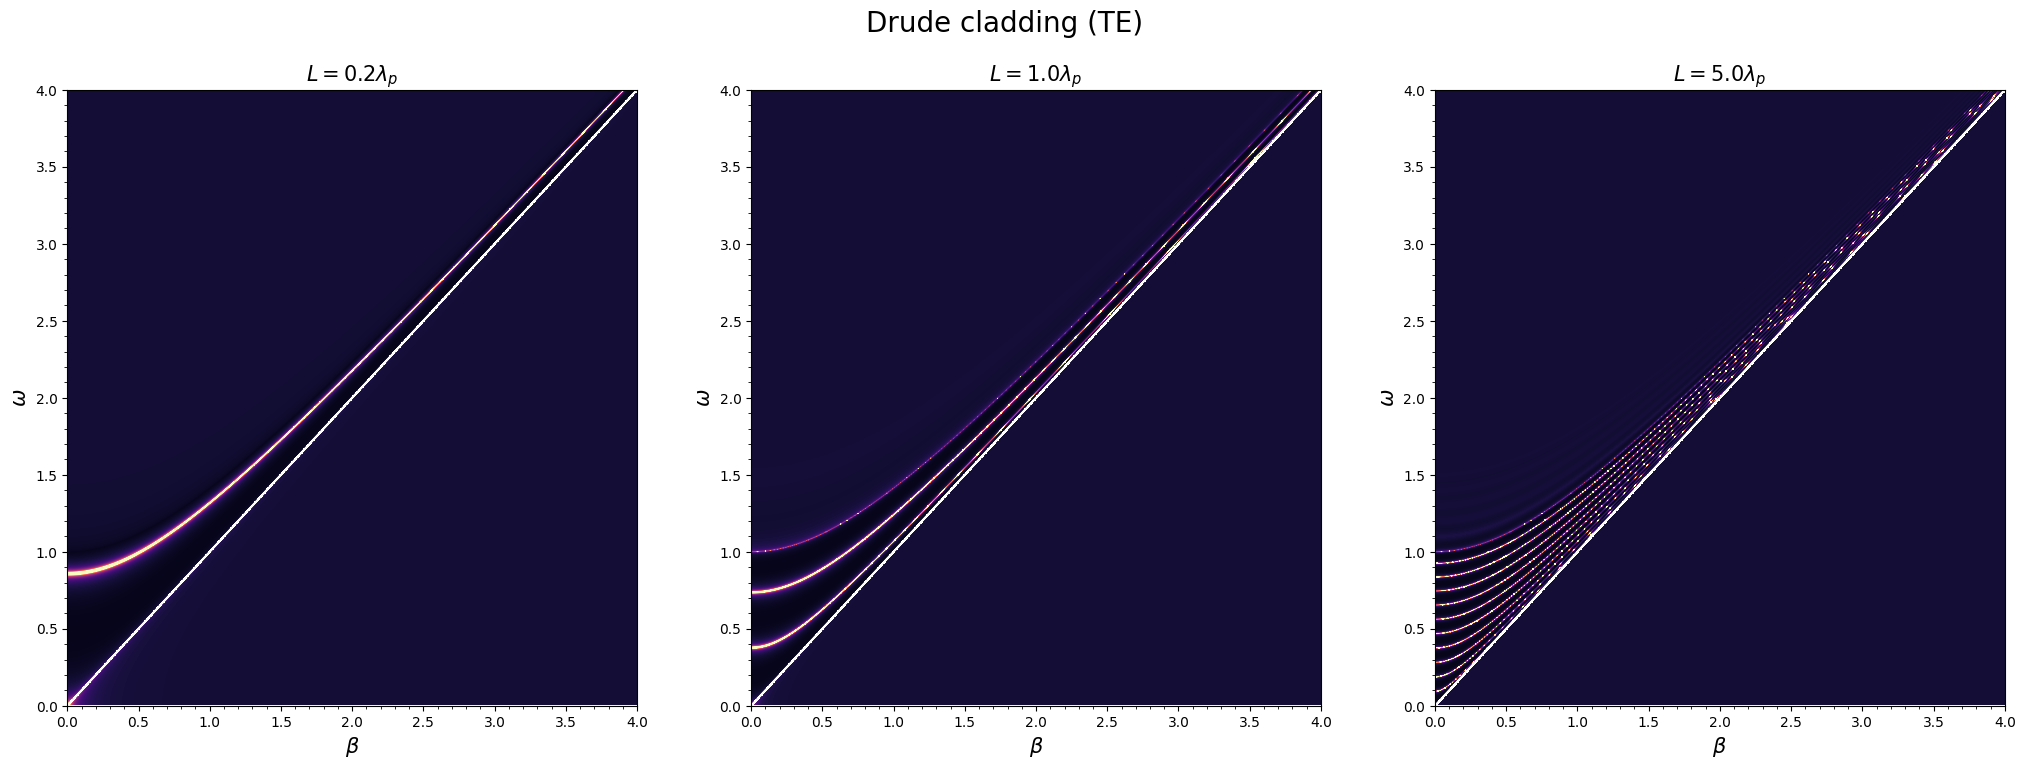

In [363]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(25, 8))

for i in range(3):
    z = 1 / abs(characteristic_func('s', L[i], grid_omega + 0.j, grid_beta + 0.j, vacuum, drude))
    ax[i].imshow(z, cmap='magma', norm=plt.Normalize(vmin=0, vmax=10), aspect='auto', origin='lower', extent=[grid_beta.min(), grid_beta.max(), grid_omega.min(), grid_omega.max()])
    ax[i].plot(grid_omega_1D, grid_omega_1D, color='white')
    ax[i].set_title(f'$L={L[i] / lambda_p} \\lambda_p$', size=15)
    ax[i].set_xlabel('$\\beta$', size=15)
    ax[i].set_ylabel('$\\omega$', size=15)
    ax[i].minorticks_on()

fig.suptitle('Drude cladding (TE)', size=20)
plt.show()

##### 0.2.2 Metallic film

/tmp/ipykernel_5491/3590612451.py:2: RuntimeWarning: divide by zero encountered in divide
  return eps_inf - (plasma_frequency / frequency) ** 2
/tmp/ipykernel_5491/3590612451.py:2: RuntimeWarning: invalid value encountered in divide
  return eps_inf - (plasma_frequency / frequency) ** 2
/tmp/ipykernel_5491/2820459564.py:10: RuntimeWarning: invalid value encountered in divide
  a = k_z(omega, k_par, permeability_surr) / permeability_surr(omega) - k_z(omega, k_par, permeability_film) / permeability_film(omega)
/tmp/ipykernel_5491/2820459564.py:11: RuntimeWarning: invalid value encountered in divide
  b = k_z(omega, k_par, permeability_surr) / permeability_surr(omega) + k_z(omega, k_par, permeability_film) / permeability_film(omega)
/tmp/ipykernel_5491/2820459564.py:12: RuntimeWarning: invalid value encountered in divide
  return a / b


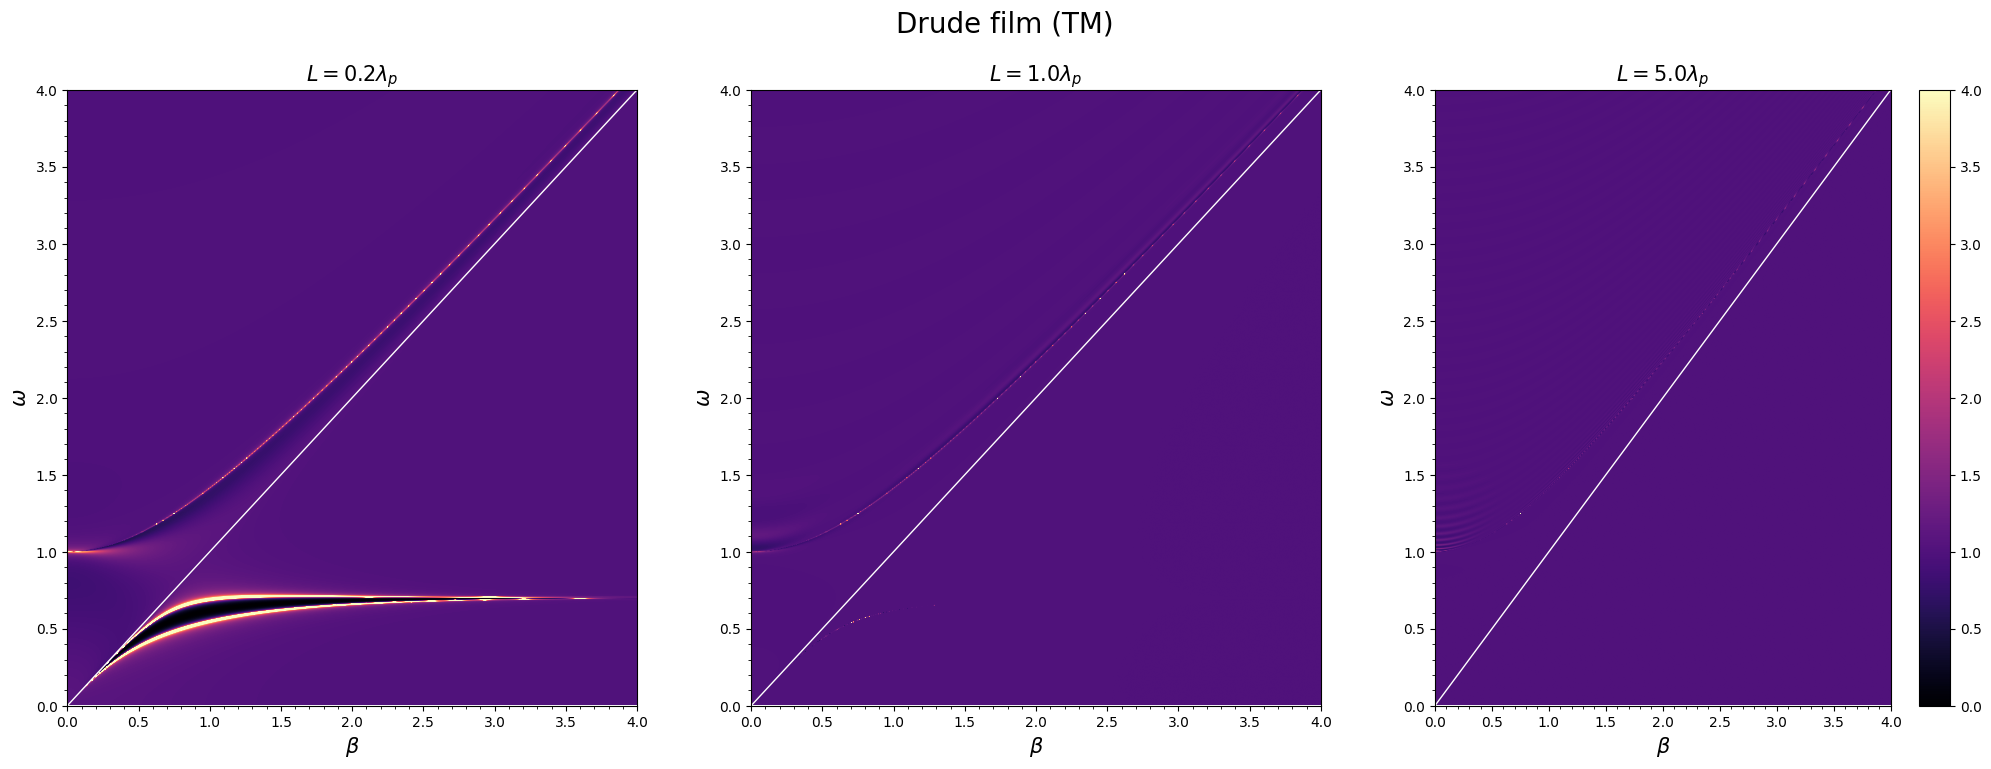

In [364]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(25, 8))

for i in range(3):
    z = 1 / abs(characteristic_func('p', L[i], grid_omega + 0.j, grid_beta + 0.j, drude, vacuum))
    pl=ax[i].imshow(z, cmap='magma', norm=plt.Normalize(vmin=0, vmax=4), aspect='auto', origin='lower', extent=[grid_beta.min(), grid_beta.max(), grid_omega.min(), grid_omega.max()])
    #pl = ax[i].imshow(np.abs(refl_ampl('p', grid_omega + 0.j, grid_beta + 0.j, drude, vacuum))**2, cmap='magma', norm=plt.Normalize(vmin=0, vmax=400), aspect='auto', origin='lower', extent=[grid_beta.min(), grid_beta.max(), grid_omega.min(), grid_omega.max()])
    ax[i].plot(grid_omega_1D, grid_omega_1D, color='white', linewidth=1)
    ax[i].set_title(f'$L={L[i] / lambda_p} \\lambda_p$', size=15)
    ax[i].set_xlabel('$\\beta$', size=15)
    ax[i].set_ylabel('$\\omega$', size=15)
    ax[i].minorticks_on()
   

fig.colorbar(pl, ax=ax[2])
fig.suptitle('Drude film (TM)', size=20)
plt.show()

/tmp/ipykernel_5491/3590612451.py:2: RuntimeWarning: divide by zero encountered in divide
  return eps_inf - (plasma_frequency / frequency) ** 2
/tmp/ipykernel_5491/3590612451.py:2: RuntimeWarning: invalid value encountered in divide
  return eps_inf - (plasma_frequency / frequency) ** 2
/tmp/ipykernel_5491/2820459564.py:8: RuntimeWarning: invalid value encountered in divide
  return a / b


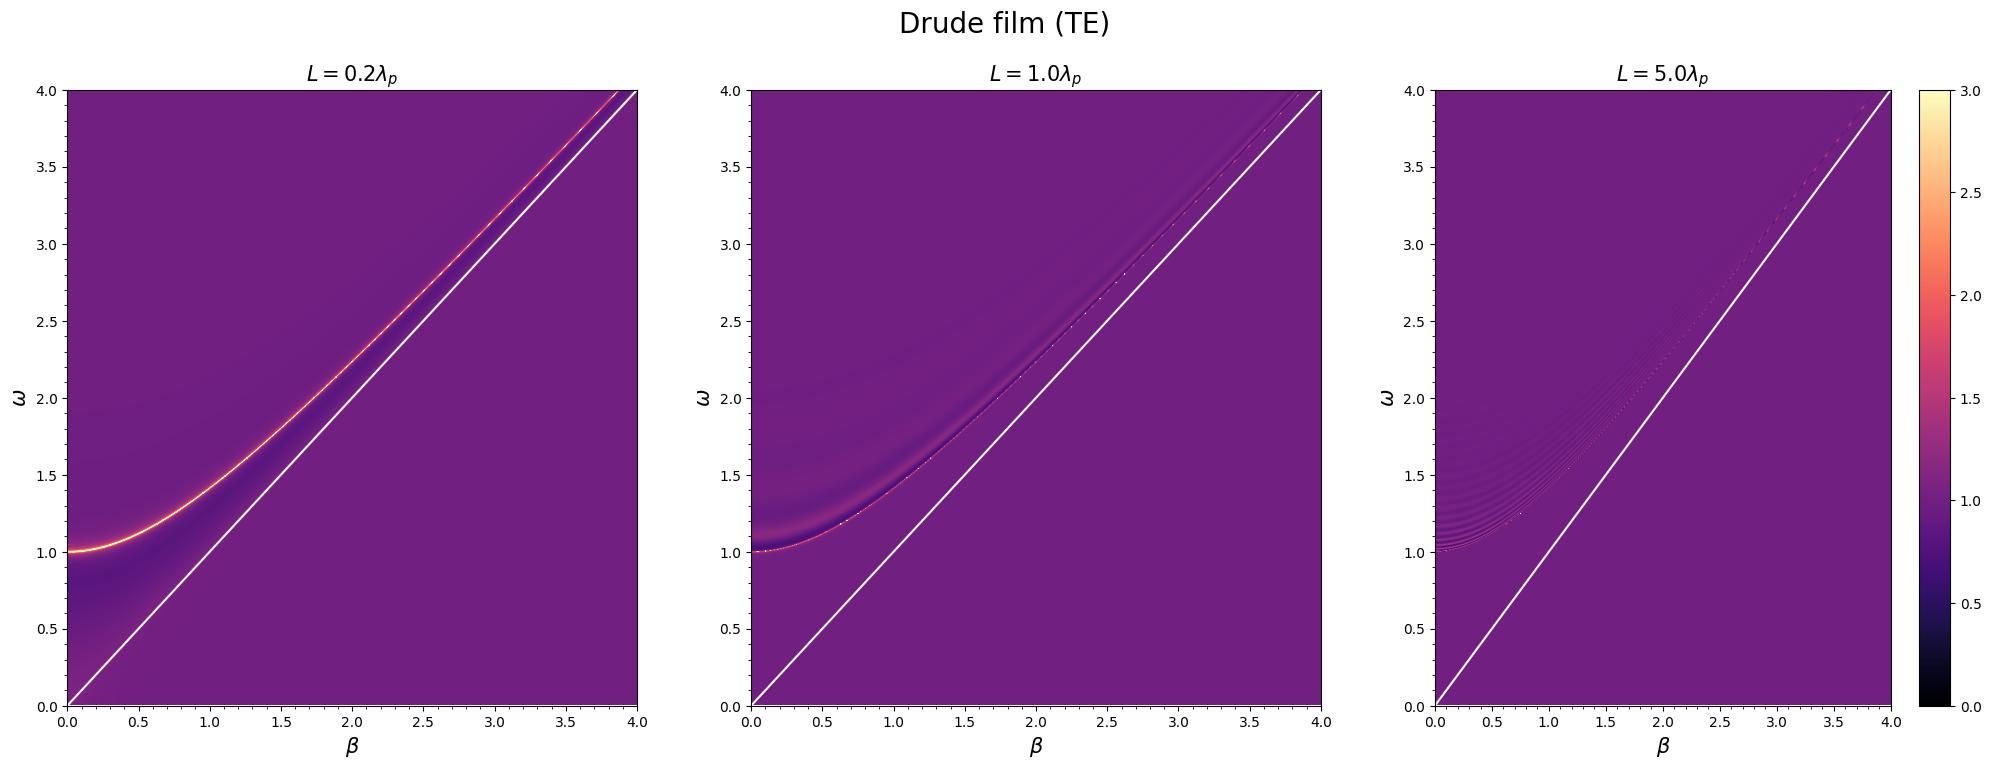

In [365]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(25, 8))

for i in range(3):
    z = 1 / abs(characteristic_func('s', L[i], grid_omega + 0.j, grid_beta + 0.j, drude, vacuum))
    pl=ax[i].imshow(z, cmap='magma', norm=plt.Normalize(vmin=0, vmax=3), aspect='auto', origin='lower', extent=[grid_beta.min(), grid_beta.max(), grid_omega.min(), grid_omega.max()])
    #pl=ax[i].imshow(np.abs(refl_ampl('s', grid_omega + 0.j, grid_beta + 0.j, drude, vacuum)), cmap='magma', norm=plt.Normalize(vmin=0, vmax=1), aspect='auto', origin='lower', extent=[grid_beta.min(), grid_beta.max(), grid_omega.min(), grid_omega.max()])
    ax[i].plot(grid_omega_1D, grid_omega_1D, color='white')
    ax[i].set_title(f'$L={L[i] / lambda_p} \\lambda_p$', size=15)
    ax[i].set_xlabel('$\\beta$', size=15)
    ax[i].set_ylabel('$\\omega$', size=15)
    ax[i].minorticks_on()

fig.colorbar(pl, ax=ax[2])
fig.suptitle('Drude film (TE)', size=20)
plt.show()

/tmp/ipykernel_5491/3590612451.py:2: RuntimeWarning: divide by zero encountered in divide
  return eps_inf - (plasma_frequency / frequency) ** 2
/tmp/ipykernel_5491/3590612451.py:2: RuntimeWarning: invalid value encountered in divide
  return eps_inf - (plasma_frequency / frequency) ** 2
/tmp/ipykernel_5491/2820459564.py:10: RuntimeWarning: invalid value encountered in divide
  a = k_z(omega, k_par, permeability_surr) / permeability_surr(omega) - k_z(omega, k_par, permeability_film) / permeability_film(omega)
/tmp/ipykernel_5491/2820459564.py:11: RuntimeWarning: invalid value encountered in divide
  b = k_z(omega, k_par, permeability_surr) / permeability_surr(omega) + k_z(omega, k_par, permeability_film) / permeability_film(omega)
/tmp/ipykernel_5491/2820459564.py:12: RuntimeWarning: invalid value encountered in divide
  return a / b


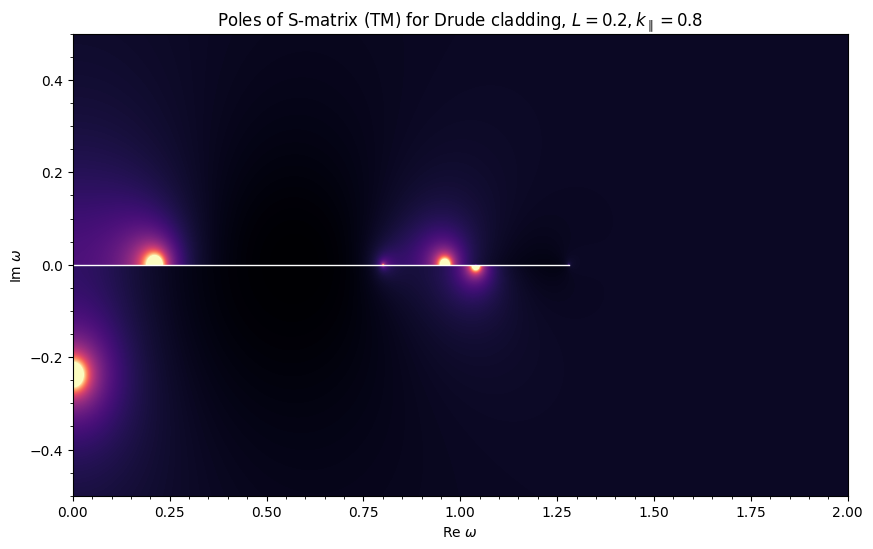

In [366]:
plt.figure(figsize=(10, 6))
z = 1 / abs(characteristic_func('p', 0.2, grid, 0.8, vacuum, drude))
plt.imshow(z, cmap='magma', norm=plt.Normalize(vmin=0, vmax=15), aspect='auto', origin='lower', extent=[grid_real.min(), grid_real.max(), grid_im.min(), grid_im.max()])
plt.plot(np.linspace(0, np.sqrt(1 + .8**2), 1000), np.zeros(1000), color='white', linewidth=1)
plt.title('Poles of S-matrix (TM) for Drude cladding, $L=0.2, k_{\\parallel} = 0.8$')
plt.xlabel('Re $\\omega$')
plt.ylabel('Im $\\omega$')
plt.minorticks_on()

plt.show()

/tmp/ipykernel_5491/3590612451.py:2: RuntimeWarning: divide by zero encountered in divide
  return eps_inf - (plasma_frequency / frequency) ** 2
/tmp/ipykernel_5491/3590612451.py:2: RuntimeWarning: invalid value encountered in divide
  return eps_inf - (plasma_frequency / frequency) ** 2
/tmp/ipykernel_5491/2820459564.py:10: RuntimeWarning: invalid value encountered in divide
  a = k_z(omega, k_par, permeability_surr) / permeability_surr(omega) - k_z(omega, k_par, permeability_film) / permeability_film(omega)
/tmp/ipykernel_5491/2820459564.py:11: RuntimeWarning: invalid value encountered in divide
  b = k_z(omega, k_par, permeability_surr) / permeability_surr(omega) + k_z(omega, k_par, permeability_film) / permeability_film(omega)
/tmp/ipykernel_5491/2820459564.py:12: RuntimeWarning: invalid value encountered in divide
  return a / b


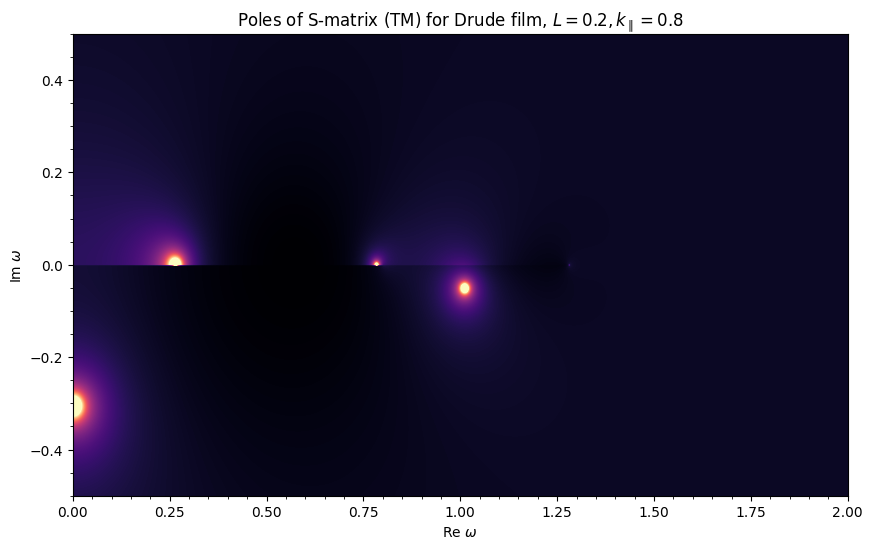

In [367]:
plt.figure(figsize=(10, 6))
z = 1 / abs(characteristic_func('p', 0.2, grid, 0.8, drude, vacuum))
plt.imshow(z, cmap='magma', norm=plt.Normalize(vmin=0, vmax=15), aspect='auto', origin='lower', extent=[grid_real.min(), grid_real.max(), grid_im.min(), grid_im.max()])
#plt.plot(np.linspace(0, 2, 1000), np.zeros(1000), color='white', linewidth=1)
plt.title('Poles of S-matrix (TM) for Drude film, $L=0.2, k_{\\parallel} = 0.8$')
plt.xlabel('Re $\\omega$')
plt.ylabel('Im $\\omega$')
plt.minorticks_on()

plt.show()

# 1. Lorentz

In [368]:
def lorentz(frequency, damping_factor=0, resonance_frequency=1, eps_inf=1, f=1, plasma_frequency=1):
    return eps_inf + f * plasma_frequency**2 / (resonance_frequency ** 2 - frequency ** 2 - 1.j * damping_factor * frequency)

### 1.1 Without damping

In [369]:
resonance_frequency = 1.5

##### 1.1.1 Cladding

/tmp/ipykernel_5491/2820459564.py:12: RuntimeWarning: invalid value encountered in divide
  return a / b
/tmp/ipykernel_5491/3898618575.py:4: RuntimeWarning: divide by zero encountered in divide
  z = 1 / abs(characteristic_func('p', L[i], grid_omega + 0.j, grid_beta + 0.j, vacuum, lorentz))


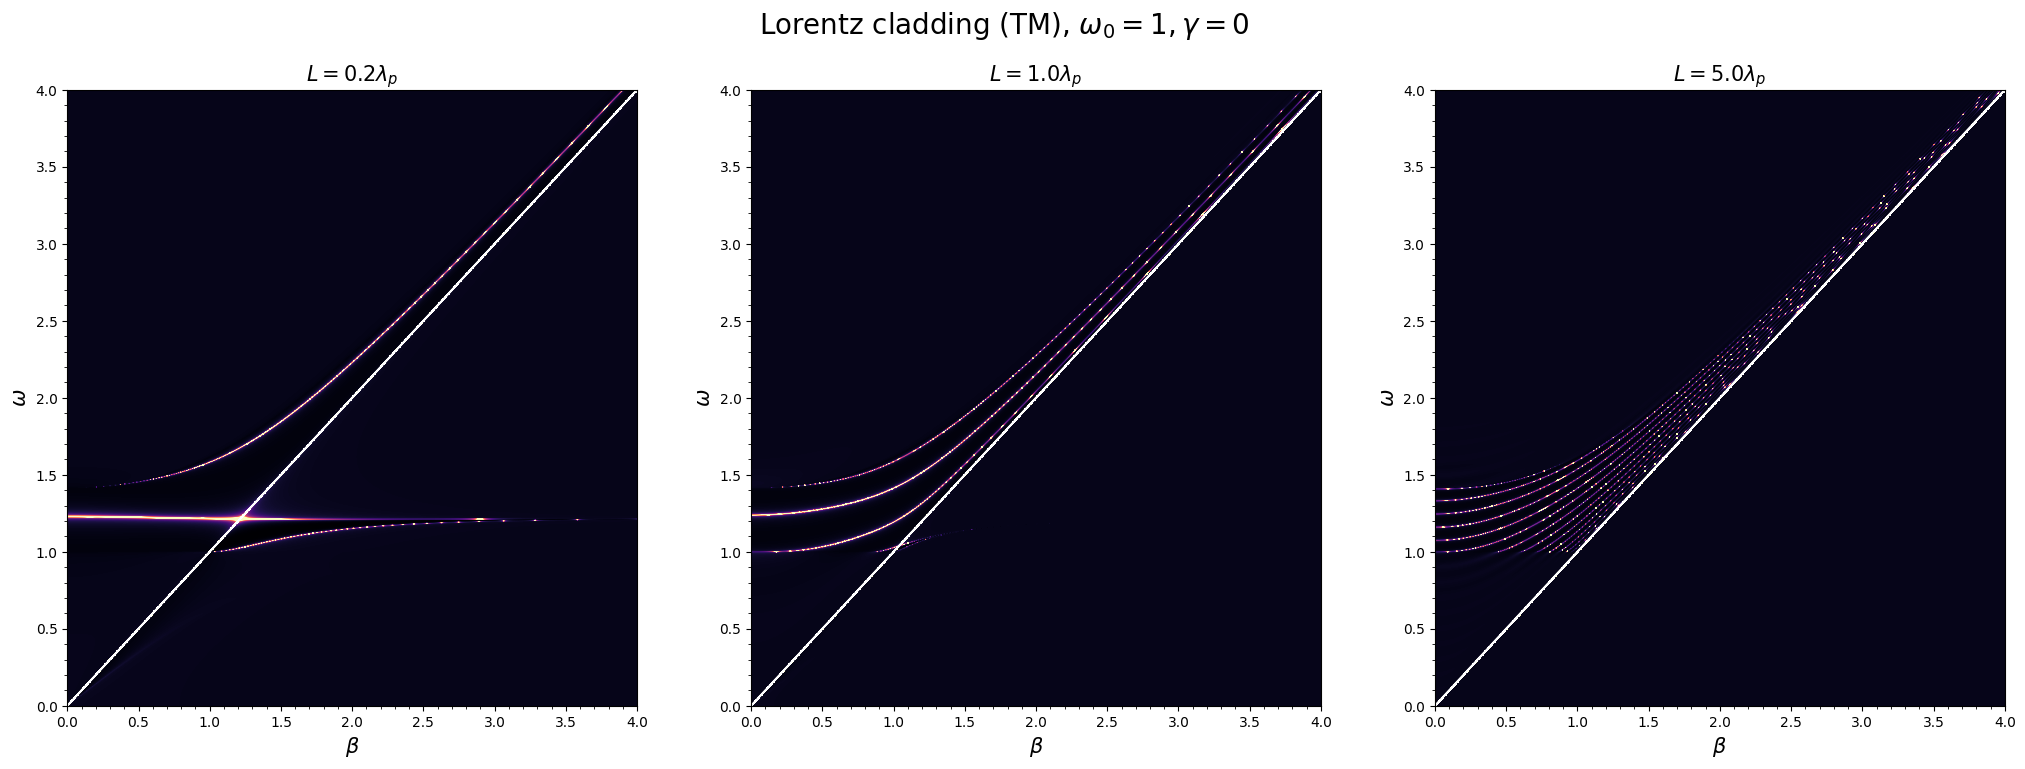

In [370]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(25, 8))

for i in range(3):
    z = 1 / abs(characteristic_func('p', L[i], grid_omega + 0.j, grid_beta + 0.j, vacuum, lorentz))
    ax[i].imshow(z, cmap='magma', norm=plt.Normalize(vmin=0, vmax=20), aspect='auto', origin='lower', extent=[grid_beta.min(), grid_beta.max(), grid_omega.min(), grid_omega.max()])
    ax[i].plot(grid_omega_1D, grid_omega_1D, color='white') #light line
    ax[i].set_title(f'$L={L[i] / lambda_p} \\lambda_p$', size=15)
    ax[i].set_xlabel('$\\beta$', size=15)
    ax[i].set_ylabel('$\\omega$', size=15)
    ax[i].minorticks_on()

fig.suptitle('Lorentz cladding (TM), $\\omega_0 = 1, \\gamma = 0$', size=20)
plt.show()

/tmp/ipykernel_5491/2820459564.py:8: RuntimeWarning: invalid value encountered in divide
  return a / b
/tmp/ipykernel_5491/4011631055.py:4: RuntimeWarning: divide by zero encountered in divide
  z = 1 / abs(characteristic_func('s', L[i], grid_omega + 0.j, grid_beta + 0.j, vacuum, lorentz))


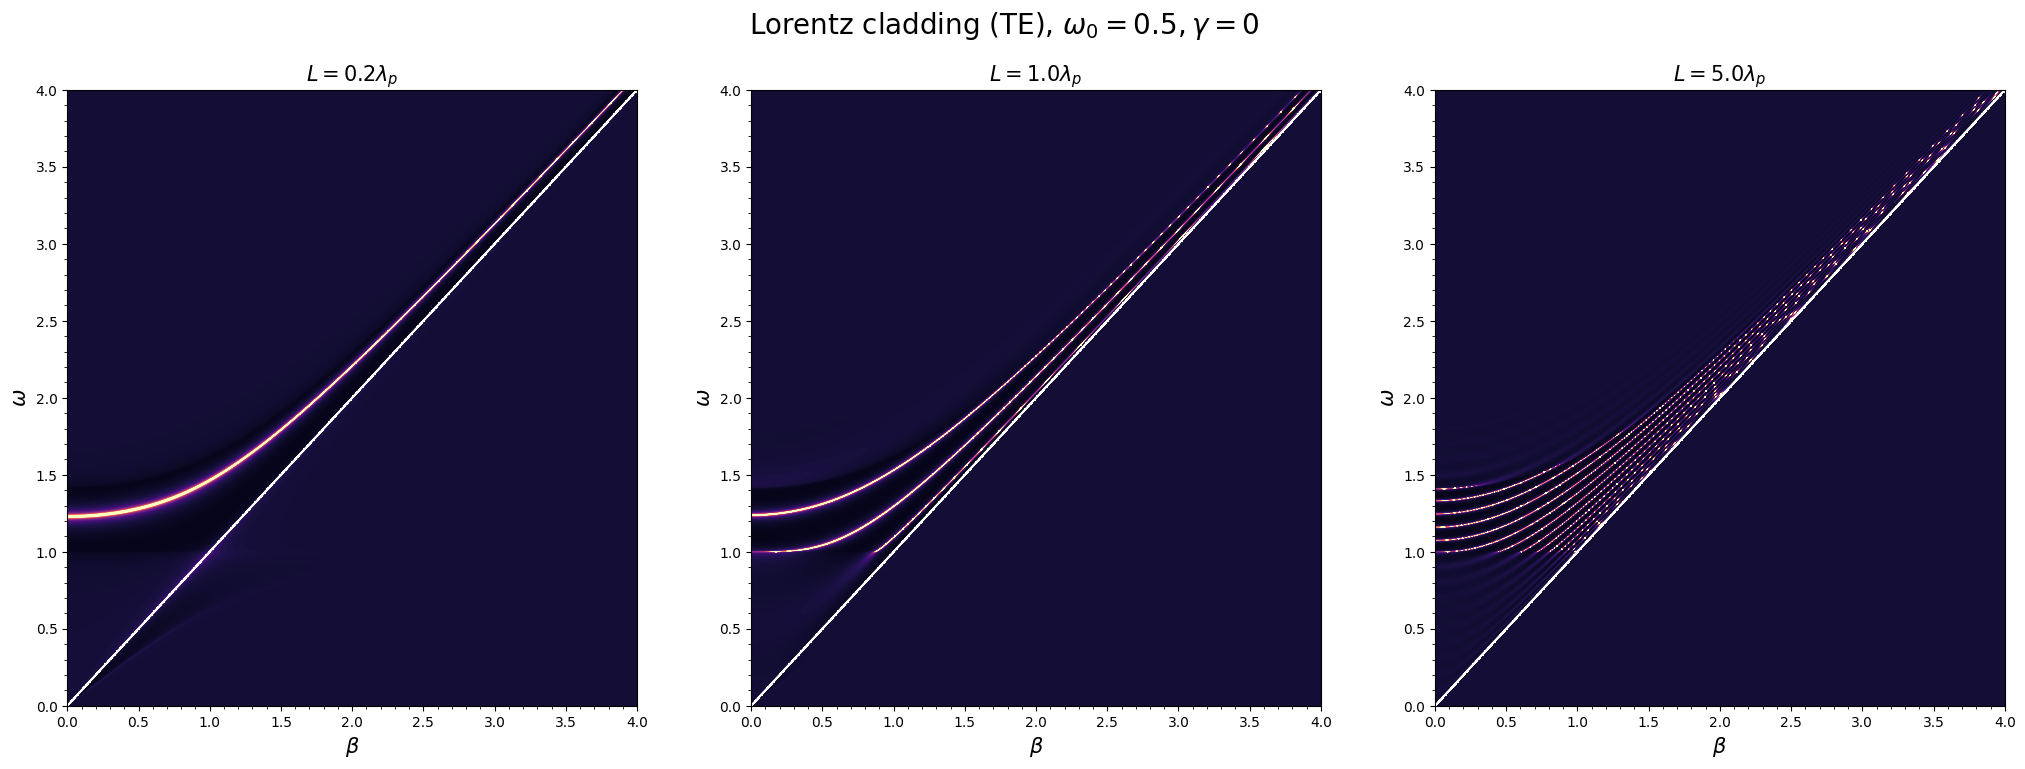

In [371]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(25, 8))

for i in range(3):
    z = 1 / abs(characteristic_func('s', L[i], grid_omega + 0.j, grid_beta + 0.j, vacuum, lorentz))
    ax[i].imshow(z, cmap='magma', norm=plt.Normalize(vmin=0, vmax=10), aspect='auto', origin='lower', extent=[grid_beta.min(), grid_beta.max(), grid_omega.min(), grid_omega.max()])
    ax[i].plot(grid_omega_1D, grid_omega_1D, color='white')
    ax[i].set_title(f'$L={L[i] / lambda_p} \\lambda_p$', size=15)
    ax[i].set_xlabel('$\\beta$', size=15)
    ax[i].set_ylabel('$\\omega$', size=15)
    ax[i].minorticks_on()

fig.suptitle('Lorentz cladding (TE), $\\omega_0 = 0.5, \\gamma = 0$', size=20)
plt.show()

##### 1.1.2 Film

/tmp/ipykernel_5491/2820459564.py:12: RuntimeWarning: invalid value encountered in divide
  return a / b


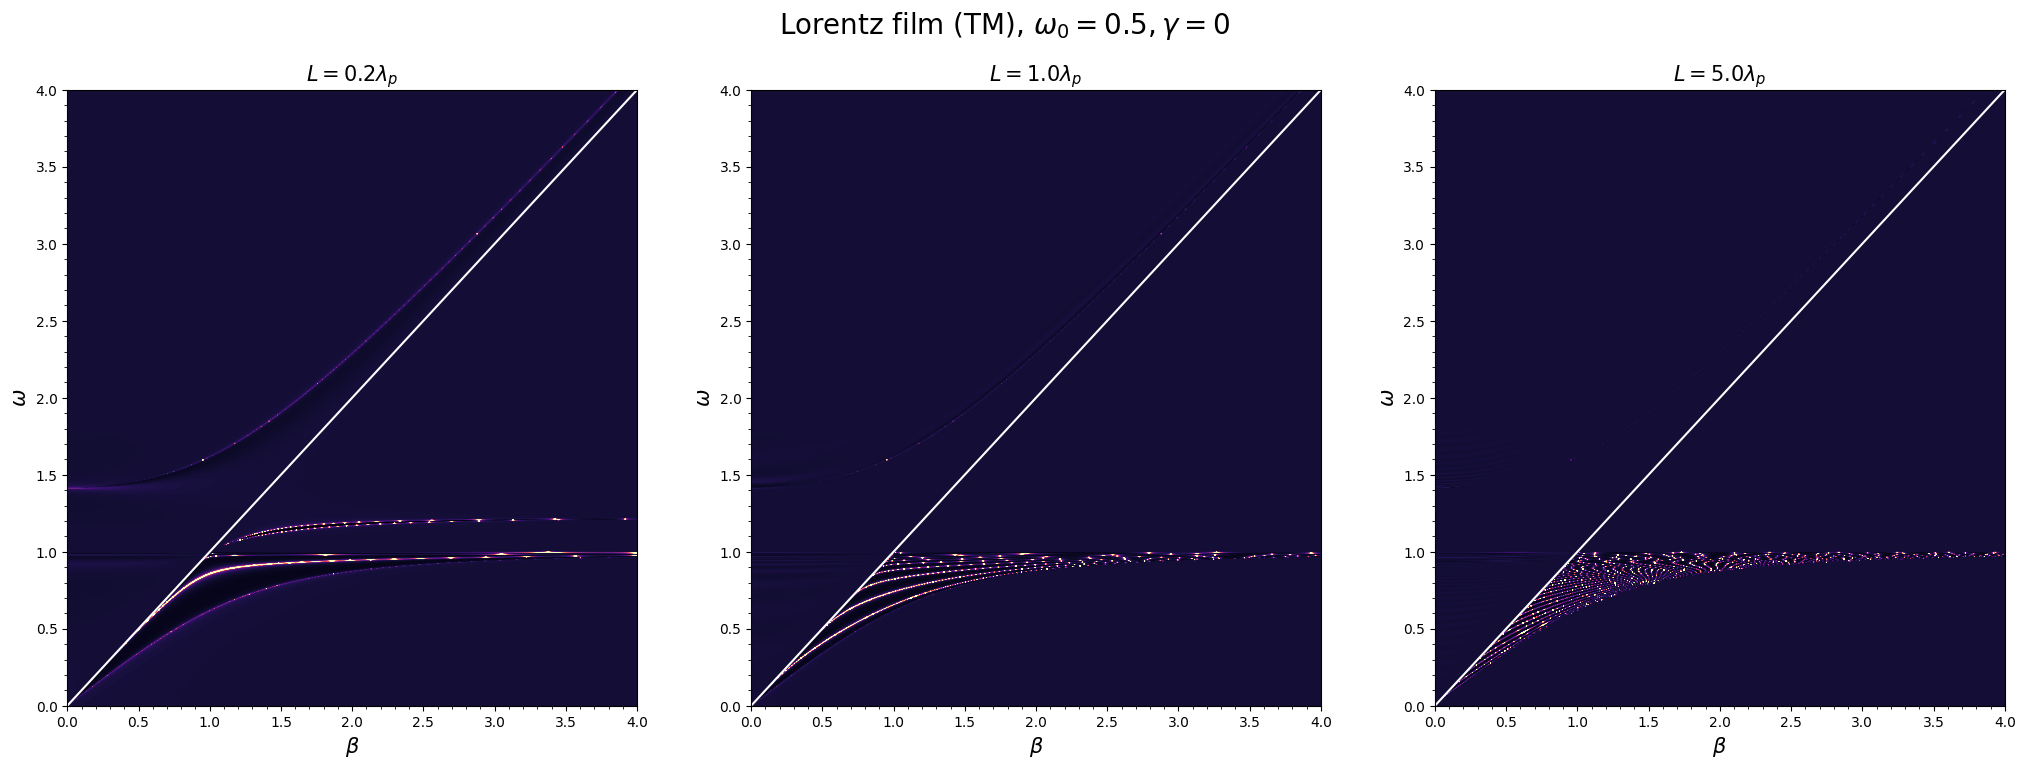

In [372]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(25, 8))

for i in range(3):
    z = 1 / abs(characteristic_func('p', L[i], grid_omega + 0.j, grid_beta + 0.j, lorentz, vacuum))
    ax[i].imshow(z, cmap='magma', norm=plt.Normalize(vmin=0, vmax=10), aspect='auto', origin='lower', extent=[grid_beta.min(), grid_beta.max(), grid_omega.min(), grid_omega.max()])
    ax[i].plot(grid_omega_1D, grid_omega_1D, color='white') #light line
    ax[i].set_title(f'$L={L[i] / lambda_p} \\lambda_p$', size=15)
    ax[i].set_xlabel('$\\beta$', size=15)
    ax[i].set_ylabel('$\\omega$', size=15)
    ax[i].minorticks_on()

fig.suptitle('Lorentz film (TM), $\\omega_0 = 0.5, \\gamma = 0$', size=20)
plt.show()

/tmp/ipykernel_5491/2820459564.py:8: RuntimeWarning: invalid value encountered in divide
  return a / b


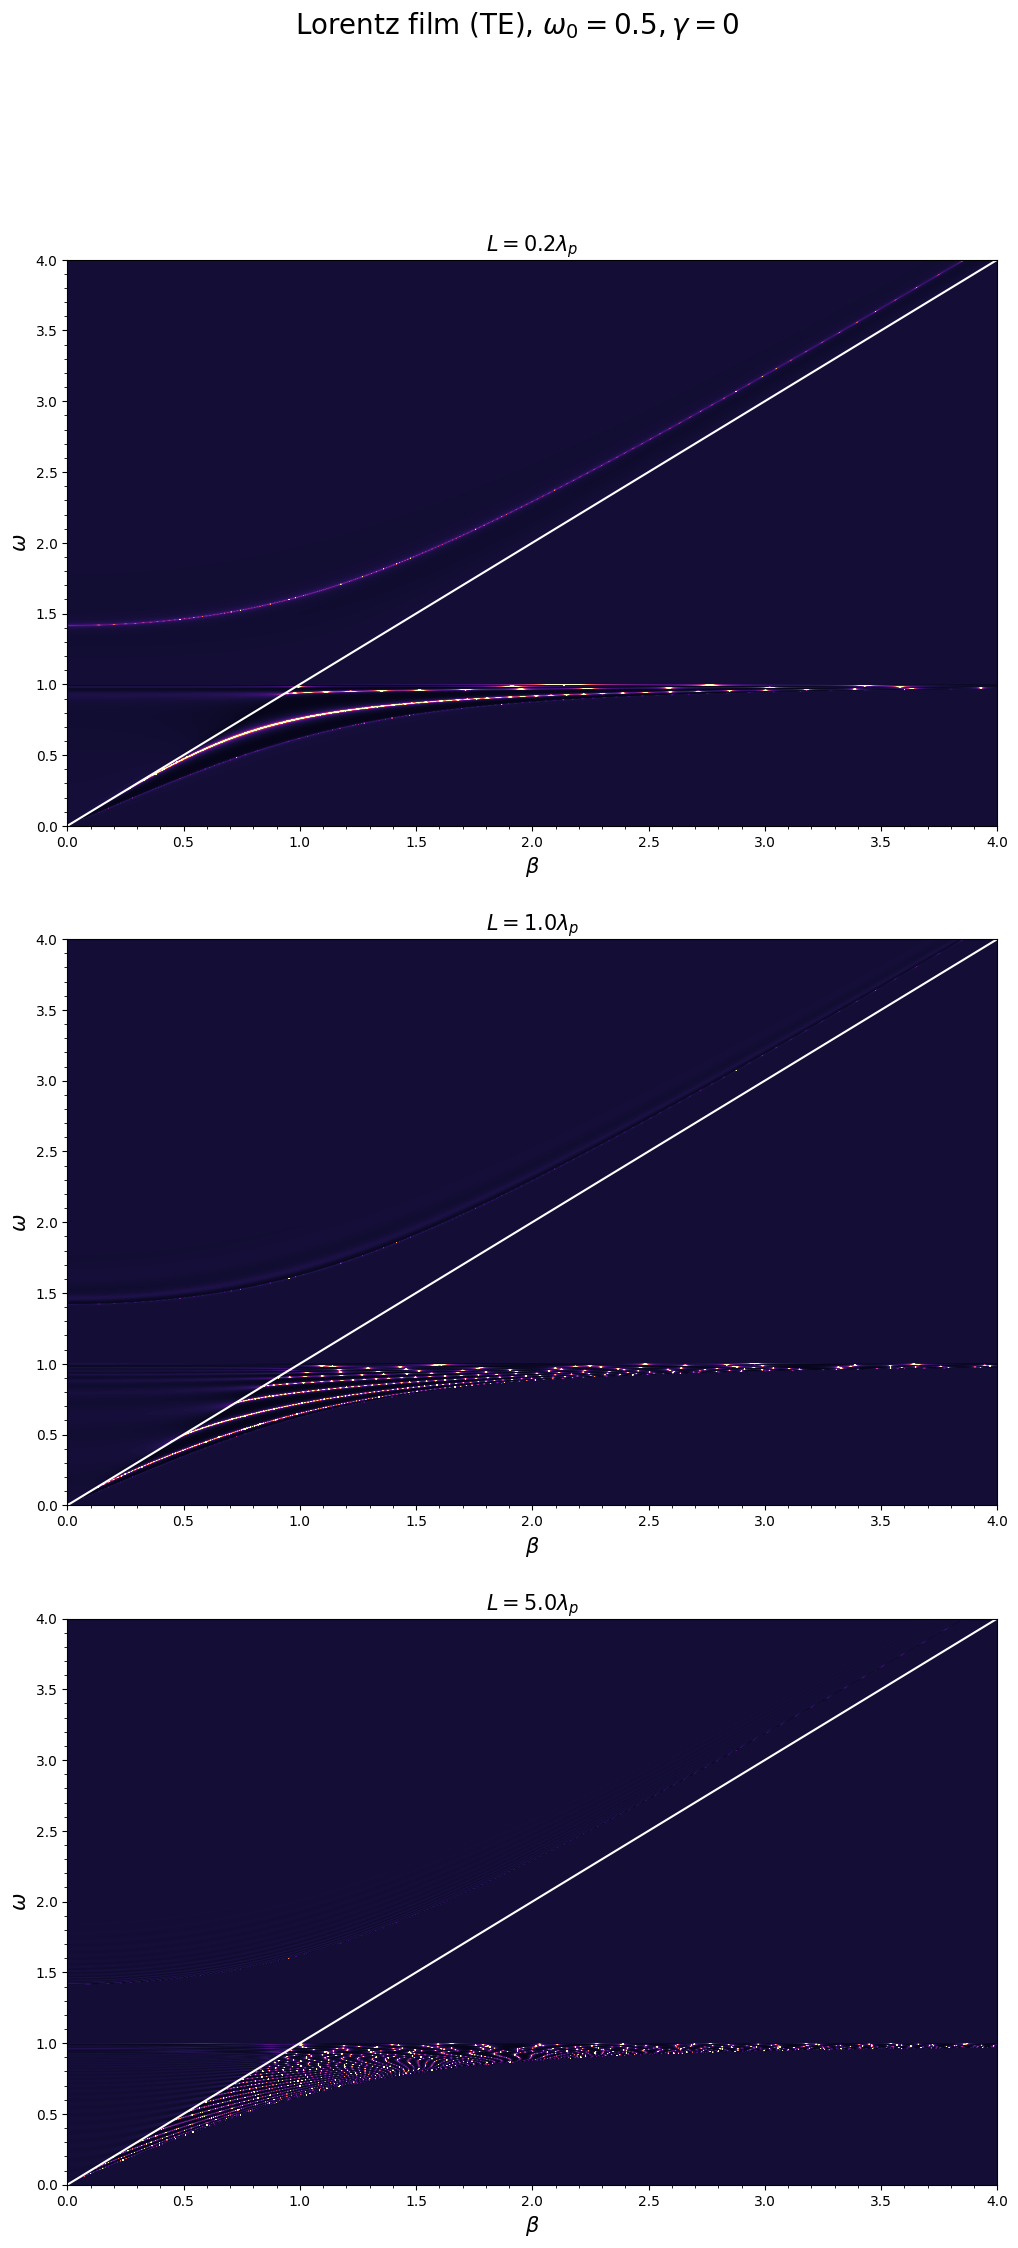

In [373]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(12, 25))

for i in range(3):
    z = 1 / abs(characteristic_func('s', L[i], grid_omega + 0.j, grid_beta + 0.j, lorentz, vacuum))
    ax[i].imshow(z, cmap='magma', norm=plt.Normalize(vmin=0, vmax=10), aspect='auto', origin='lower', extent=[grid_beta.min(), grid_beta.max(), grid_omega.min(), grid_omega.max()])
    ax[i].plot(grid_omega_1D, grid_omega_1D, color='white')
    ax[i].set_title(f'$L={L[i] / lambda_p} \\lambda_p$', size=15)
    ax[i].set_xlabel('$\\beta$', size=15)
    ax[i].set_ylabel('$\\omega$', size=15)
    ax[i].minorticks_on()

fig.suptitle('Lorentz film (TE), $\\omega_0 = 0.5, \\gamma = 0$', size=20)
plt.show()

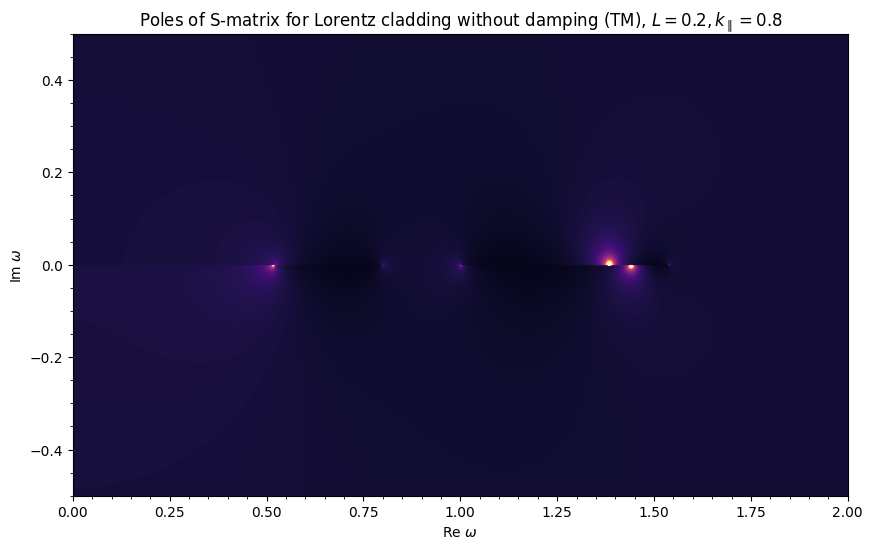

In [374]:
plt.figure(figsize=(10, 6))
z = 1 / abs(characteristic_func('p', 0.2, grid, 0.8, vacuum, lorentz))
plt.imshow(z, cmap='magma', norm=plt.Normalize(vmin=0, vmax=10), aspect='auto', origin='lower', extent=[grid_real.min(), grid_real.max(), grid_im.min(), grid_im.max()])
#plt.plot(np.linspace(0, 2, 1000), np.zeros(1000), color='white', linewidth=1)
plt.title('Poles of S-matrix for Lorentz cladding without damping (TM), $L=0.2, k_{\\parallel} = 0.8$')
plt.xlabel('Re $\\omega$')
plt.ylabel('Im $\\omega$')
plt.minorticks_on()

plt.show()

### 1.2 With damping

In [375]:
def lorentz_damp(frequency, damping_factor=0.05, resonance_frequency=.5, eps_inf=1, f=1, plasma_frequency=1):
    return eps_inf + f * plasma_frequency**2 / (resonance_frequency ** 2 - frequency ** 2 - 1.j * damping_factor * frequency)

/tmp/ipykernel_5491/2820459564.py:12: RuntimeWarning: invalid value encountered in divide
  return a / b
/tmp/ipykernel_5491/2903715715.py:4: RuntimeWarning: divide by zero encountered in divide
  z = 1 / abs(characteristic_func('p', L[i], grid_omega + 0.j, grid_beta + 0.j, vacuum, lorentz_damp))


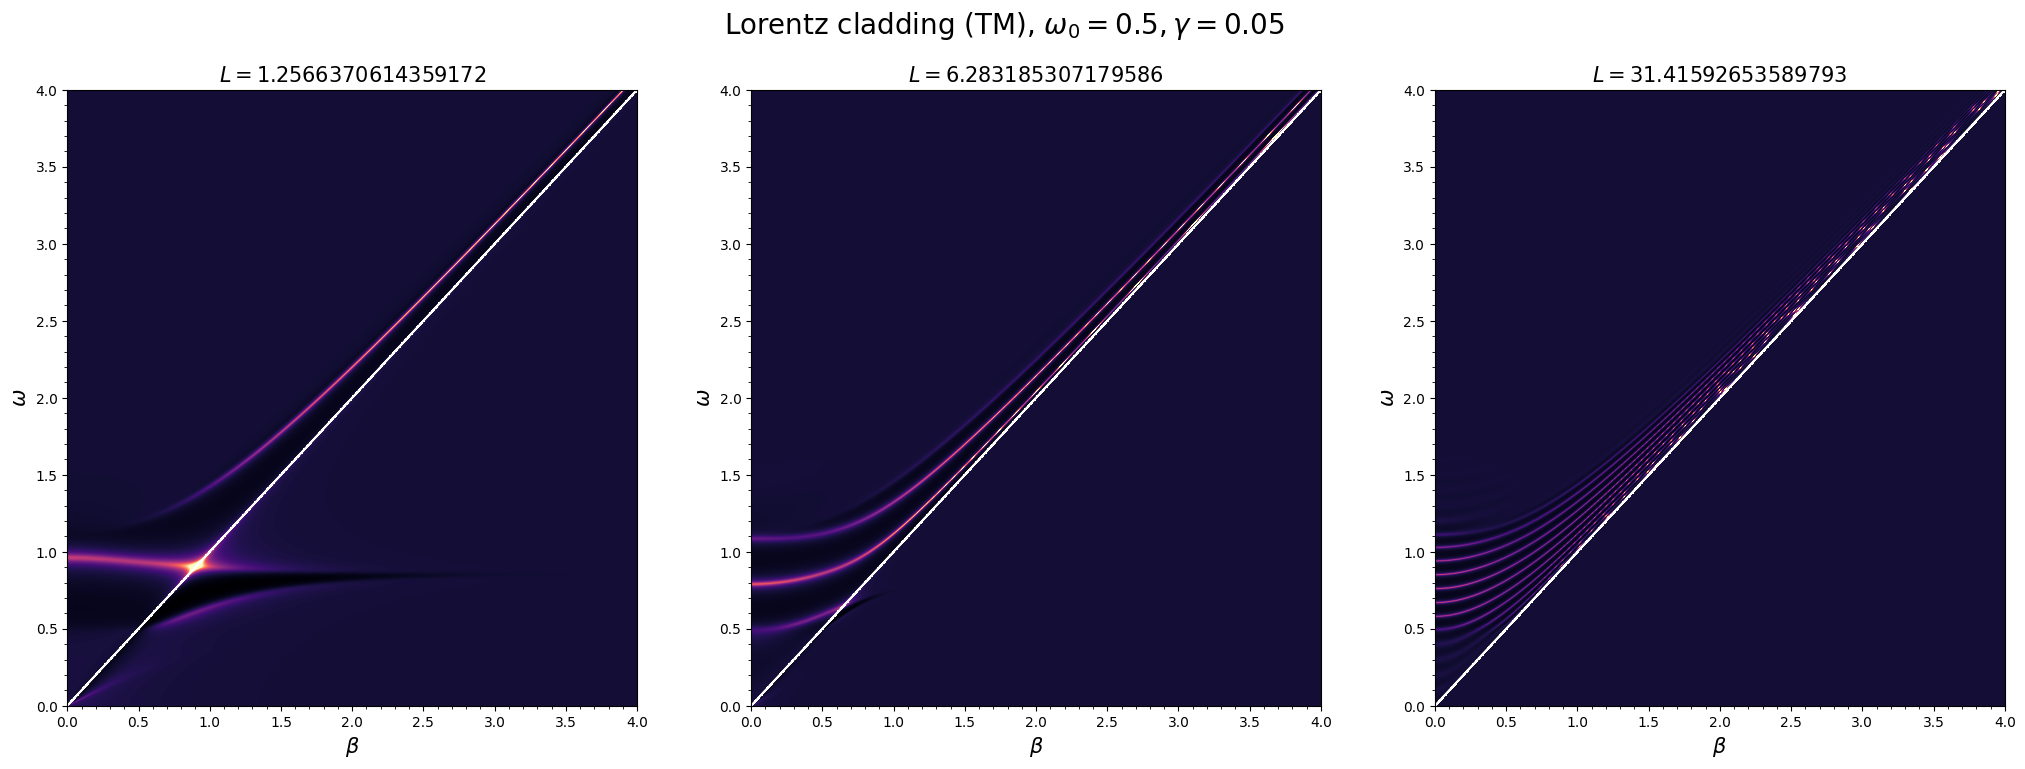

In [376]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(25, 8))

for i in range(3):
    z = 1 / abs(characteristic_func('p', L[i], grid_omega + 0.j, grid_beta + 0.j, vacuum, lorentz_damp))
    ax[i].imshow(z, cmap='magma', norm=plt.Normalize(vmin=0, vmax=10), aspect='auto', origin='lower', extent=[grid_beta.min(), grid_beta.max(), grid_omega.min(), grid_omega.max()])
    ax[i].plot(grid_omega_1D, grid_omega_1D, color='white') #light line
    ax[i].set_title(f'$L={L[i]}$', size=15)
    ax[i].set_xlabel('$\\beta$', size=15)
    ax[i].set_ylabel('$\\omega$', size=15)
    ax[i].minorticks_on()

fig.suptitle('Lorentz cladding (TM), $\\omega_0 = 0.5, \\gamma = 0.05$', size=20)
plt.show()

/tmp/ipykernel_5491/2820459564.py:8: RuntimeWarning: invalid value encountered in divide
  return a / b
/tmp/ipykernel_5491/2815764563.py:4: RuntimeWarning: divide by zero encountered in divide
  z = 1 / abs(characteristic_func('s', L[i], grid_omega + 0.j, grid_beta + 0.j, vacuum, lorentz_damp))


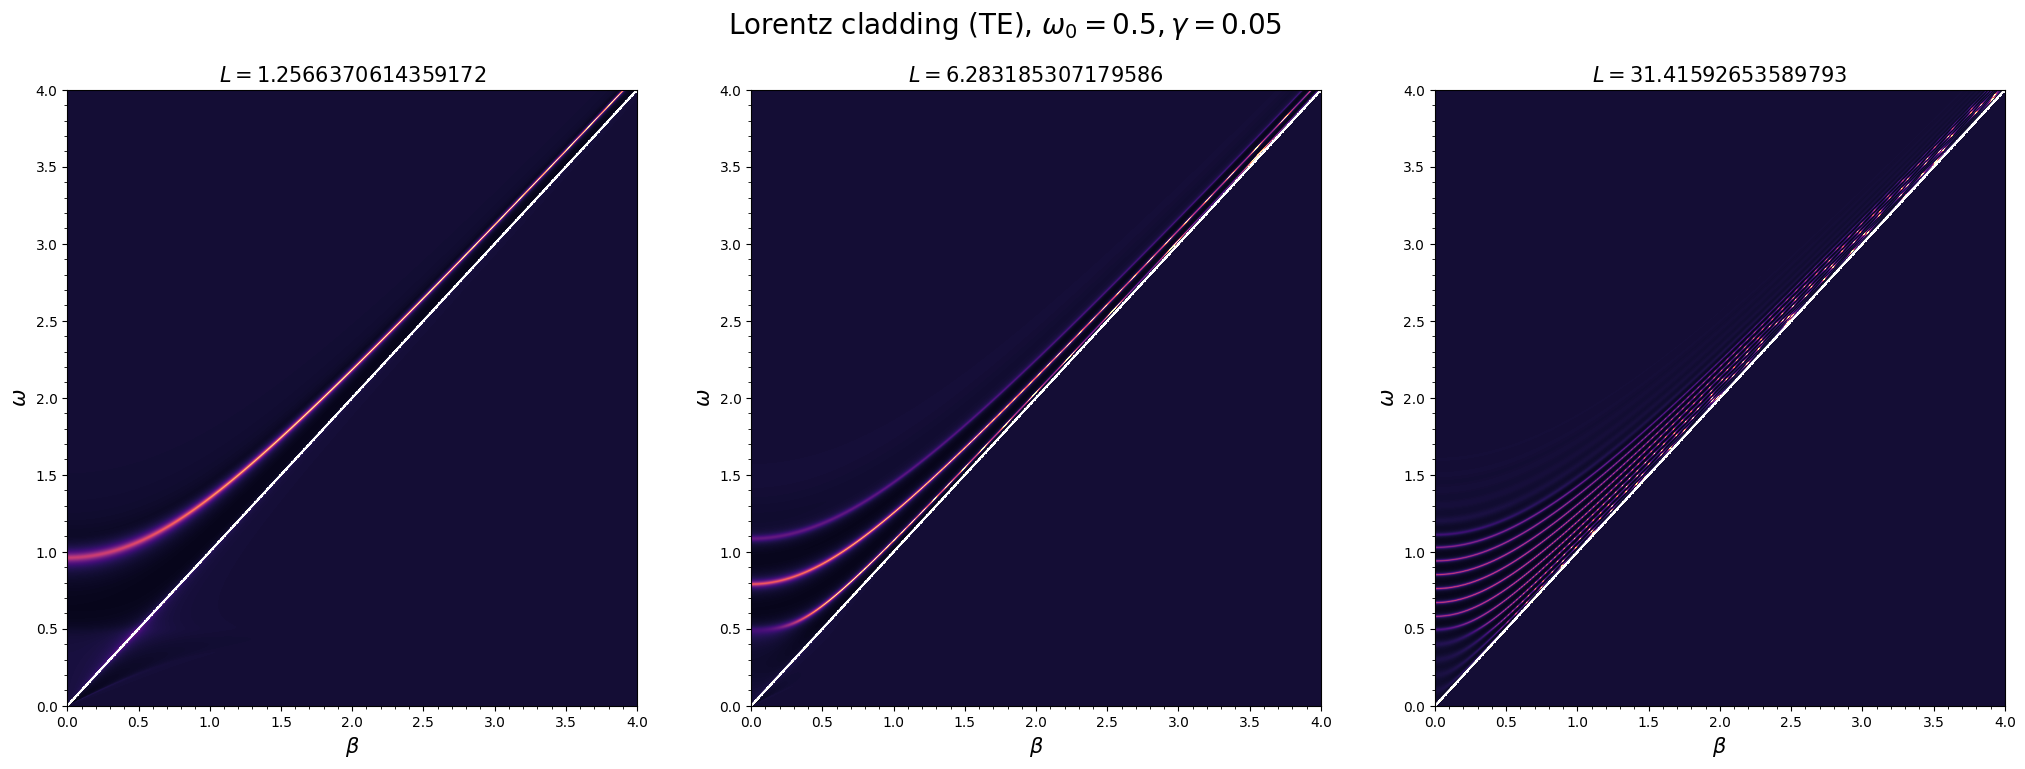

In [377]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(25, 8))

for i in range(3):
    z = 1 / abs(characteristic_func('s', L[i], grid_omega + 0.j, grid_beta + 0.j, vacuum, lorentz_damp))
    ax[i].imshow(z, cmap='magma', norm=plt.Normalize(vmin=0, vmax=10), aspect='auto', origin='lower', extent=[grid_beta.min(), grid_beta.max(), grid_omega.min(), grid_omega.max()])
    ax[i].plot(grid_omega_1D, grid_omega_1D, color='white')
    ax[i].set_title(f'$L={L[i]}$', size=15)
    ax[i].set_xlabel('$\\beta$', size=15)
    ax[i].set_ylabel('$\\omega$', size=15)
    ax[i].minorticks_on()

fig.suptitle('Lorentz cladding (TE), $\\omega_0 = 0.5, \\gamma = 0.05$', size=20)
plt.show()

/tmp/ipykernel_5491/2820459564.py:12: RuntimeWarning: invalid value encountered in divide
  return a / b


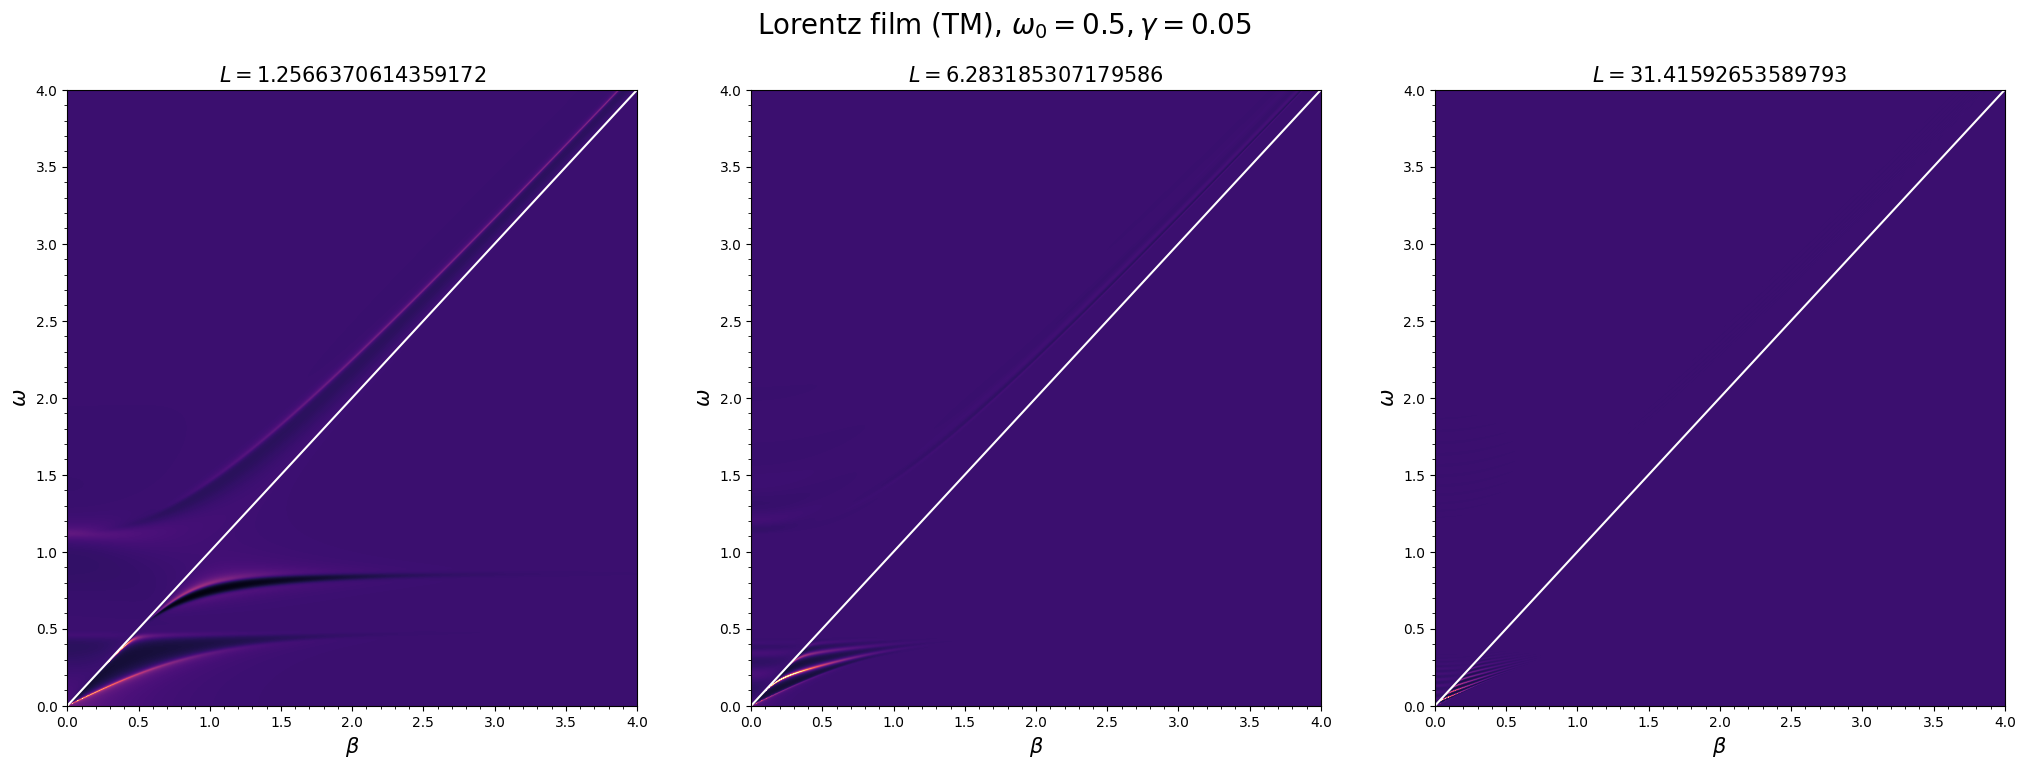

In [378]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(25, 8))

for i in range(3):
    z = 1 / abs(characteristic_func('p', L[i], grid_omega + 0.j, grid_beta + 0.j, lorentz_damp, vacuum))
    ax[i].imshow(z, cmap='magma', norm=plt.Normalize(vmin=0, vmax=5), aspect='auto', origin='lower', extent=[grid_beta.min(), grid_beta.max(), grid_omega.min(), grid_omega.max()])
    ax[i].plot(grid_omega_1D, grid_omega_1D, color='white') #light line
    ax[i].set_title(f'$L={L[i]}$', size=15)
    ax[i].set_xlabel('$\\beta$', size=15)
    ax[i].set_ylabel('$\\omega$', size=15)
    ax[i].minorticks_on()

fig.suptitle('Lorentz film (TM), $\\omega_0 = 0.5, \\gamma = 0.05$', size=20)
plt.show()

/tmp/ipykernel_5491/2820459564.py:8: RuntimeWarning: invalid value encountered in divide
  return a / b


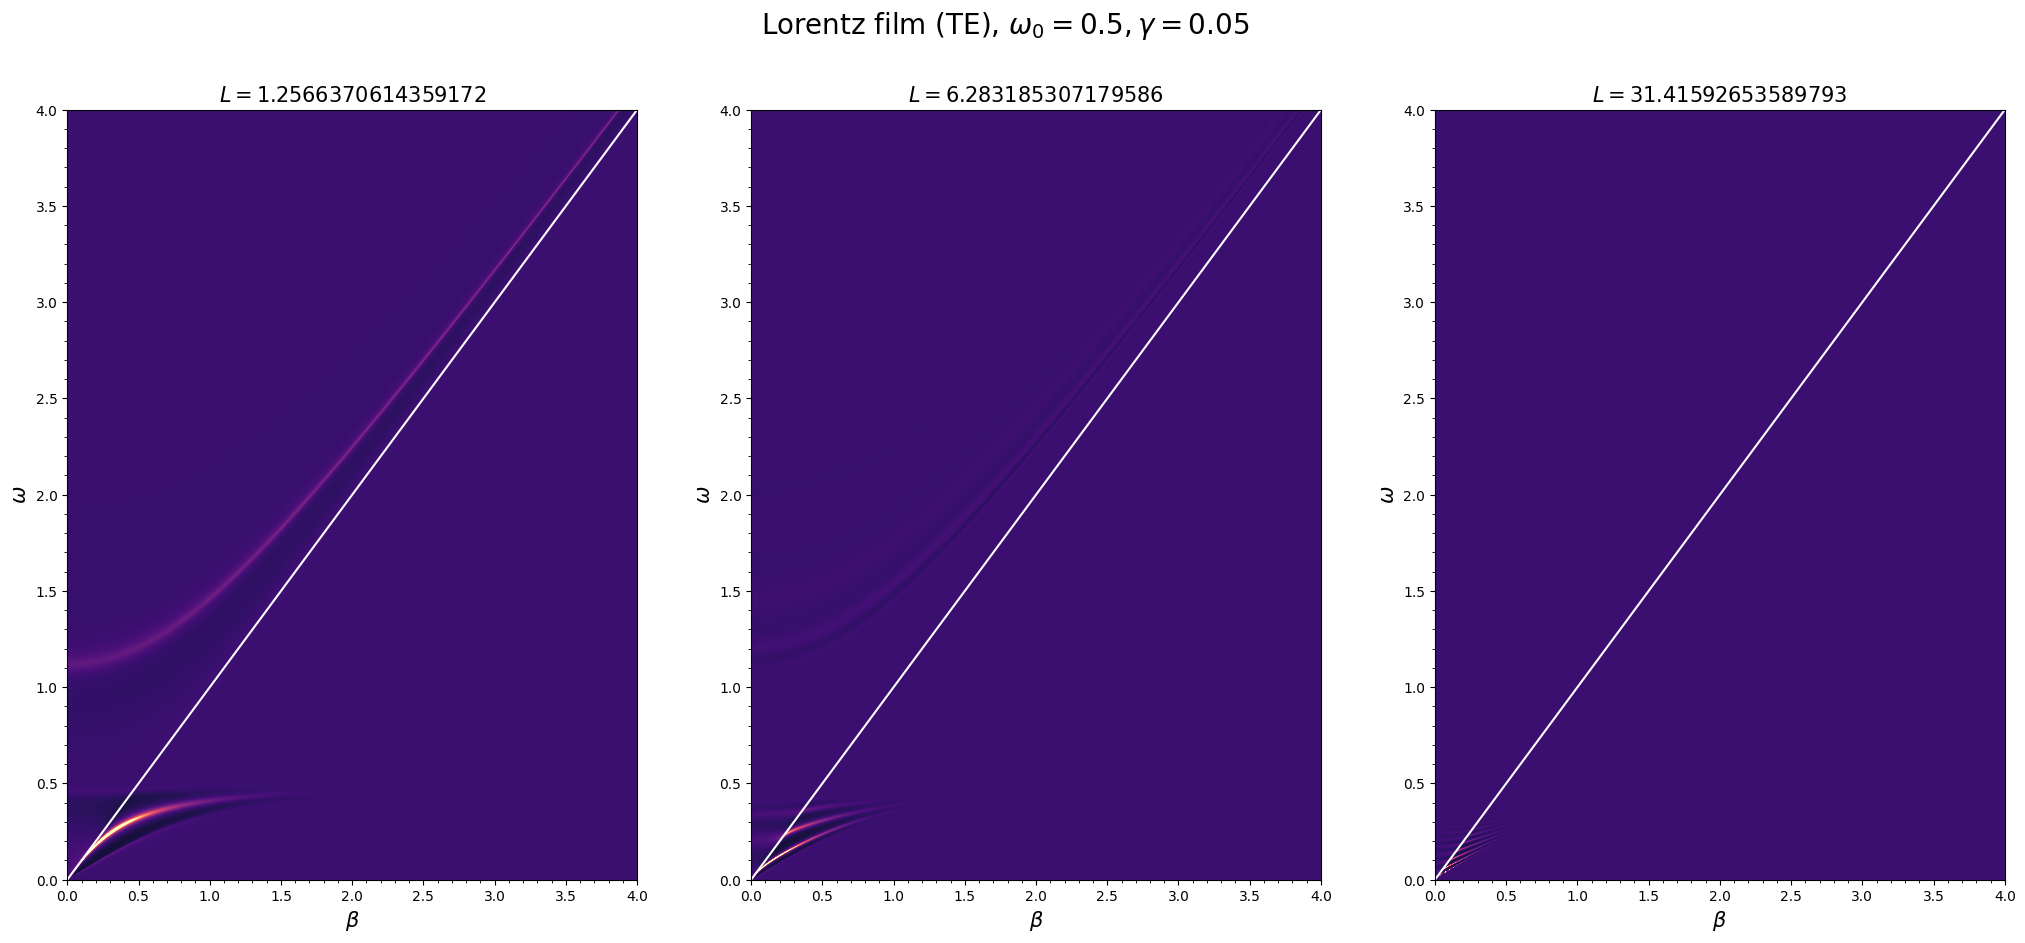

In [379]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(25, 10))

for i in range(3):
    z = 1 / abs(characteristic_func('s', L[i], grid_omega + 0.j, grid_beta + 0.j, lorentz_damp, vacuum))
    ax[i].imshow(z, cmap='magma', norm=plt.Normalize(vmin=0, vmax=5), aspect='auto', origin='lower', extent=[grid_beta.min(), grid_beta.max(), grid_omega.min(), grid_omega.max()])
    ax[i].plot(grid_omega_1D, grid_omega_1D, color='white')
    ax[i].set_title(f'$L={L[i]}$', size=15)
    ax[i].set_xlabel('$\\beta$', size=15)
    ax[i].set_ylabel('$\\omega$', size=15)
    ax[i].minorticks_on()

fig.suptitle('Lorentz film (TE), $\\omega_0 = 0.5, \\gamma = 0.05$', size=20)
plt.show()

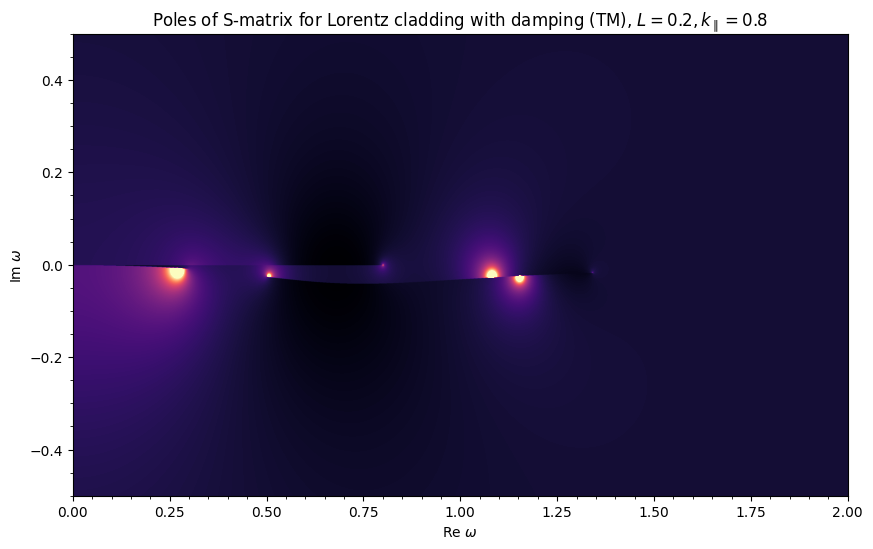

In [380]:
plt.figure(figsize=(10, 6))
z = 1 / abs(characteristic_func('p', 0.2, grid, 0.8, vacuum, lorentz_damp))
plt.imshow(z, cmap='magma', norm=plt.Normalize(vmin=0, vmax=10), aspect='auto', origin='lower', extent=[grid_real.min(), grid_real.max(), grid_im.min(), grid_im.max()])
#plt.plot(np.linspace(0, 2, 1000), np.zeros(1000), color='white', linewidth=1)
plt.title('Poles of S-matrix for Lorentz cladding with damping (TM), $L=0.2, k_{\\parallel} = 0.8$')
plt.xlabel('Re $\\omega$')
plt.ylabel('Im $\\omega$')
plt.minorticks_on()

plt.show()